[View in Colaboratory](https://colab.research.google.com/github/suchit-upx/EDA/blob/master/PPT_Exploratory_data_analysis_titanic.ipynb)

In [0]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns
import pandas_profiling

from collections import Counter
%matplotlib inline

In [35]:
from google.colab import files
import io

uploaded = files.upload()
titanic_input = pd.read_csv(io.StringIO(uploaded['titanic.csv'].decode('utf-8')))

Saving titanic.csv to titanic (5).csv


In [0]:
#titanic_input=pd.read_csv(r'titanic.csv')

In [0]:
report = pandas_profiling.ProfileReport(titanic_input)
#covert profile report as html file
report.to_file("titanic_data.html")
titanic_input.drop(['Cabin'],axis=1,inplace=True)
files.download('titanic_data.html')

In [38]:
titanic_input.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [39]:
titanic_input.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
titanic_input.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q


In [41]:
titanic_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [42]:
titanic_input['Embarked'].mode()

0    S
dtype: object

In [43]:
titanic_input['Embarked'].mode()[0]

'S'

### Data wrangling 

In [44]:
titanic_input[titanic_input['Embarked'].isnull()].index.tolist()
titanic_input.iloc[56:62,7:12]

,Parch,Ticket,Fare,Embarked
56,0,C.A. 31026,10.5000,S
57,0,2697,7.2292,C
58,2,C.A. 34651,27.7500,S
59,2,CA 2144,46.9000,S
60,0,2669,7.2292,C
61,0,113572,80.0000,NaN


In [45]:
titanic_input['Embarked'].fillna(str(titanic_input['Embarked'].mode().values[0]),inplace=True)
titanic_input.iloc[56:62,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,S
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,S


In [46]:
by_gender_class=titanic_input.groupby(['Sex','Pclass'])
def impute_median(series):
    return series.fillna(series.median())
titanic_input.Age=by_gender_class['Age'].transform(impute_median)
titanic_input.tail(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,Q


In [47]:
titanic_input.Fare[88]

263.0

In [48]:
titanic_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [0]:
import numpy as np

def detect_outliers(df,n,features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(titanic_input,2,["Age","SibSp","Parch","Fare"])
                           

In [50]:
titanic_input = titanic_input.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)
titanic_input.info()
titanic_data=titanic_input

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 11 columns):
PassengerId    876 non-null int64
Survived       876 non-null int64
Pclass         876 non-null int64
Name           876 non-null object
Sex            876 non-null object
Age            876 non-null float64
SibSp          876 non-null int64
Parch          876 non-null int64
Ticket         876 non-null object
Fare           876 non-null float64
Embarked       876 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 75.4+ KB


In [0]:
def convert_gender(gender):
    if(gender=='female'):
        gender=1
    else:
        gender=0
    return gender

titanic_input['Gender']=titanic_input['Sex'].apply(convert_gender)
class_dummies = pd.get_dummies(titanic_input['Pclass'],prefix='class')
embark_dummies = pd.get_dummies(titanic_input['Embarked'],prefix='port')

In [52]:
titanic_input = pd.concat([titanic_input,class_dummies,embark_dummies],axis=1)
#titanic_input.drop(['Pclass','Embarked'],axis=1,inplace=True)
titanic_input.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender,class_1,class_2,class_3,port_C,port_Q,port_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,0,0,0,0,1


In [53]:
titanic_input.describe()['Age']

count    876.000000
mean      28.993916
std       13.162949
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [54]:
titanic_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 18 columns):
PassengerId    876 non-null int64
Survived       876 non-null int64
Pclass         876 non-null int64
Name           876 non-null object
Sex            876 non-null object
Age            876 non-null float64
SibSp          876 non-null int64
Parch          876 non-null int64
Ticket         876 non-null object
Fare           876 non-null float64
Embarked       876 non-null object
Gender         876 non-null int64
class_1        876 non-null uint8
class_2        876 non-null uint8
class_3        876 non-null uint8
port_C         876 non-null uint8
port_Q         876 non-null uint8
port_S         876 non-null uint8
dtypes: float64(2), int64(6), object(4), uint8(6)
memory usage: 87.3+ KB


In [55]:
a=titanic_input.groupby('Survived').mean()
a

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender,class_1,class_2,class_3,port_C,port_Q,port_S
Survived,,,,,,,,,,,,,
0,446.407063,2.537175,29.647770,0.451673,0.293680,20.344972,0.144981,0.141264,0.180297,0.678439,0.137546,0.087361,0.775093
1,445.816568,1.961538,27.953166,0.458580,0.452663,46.723571,0.680473,0.390533,0.257396,0.352071,0.272189,0.088757,0.639053


In [56]:
print(a.port_S)
print(a.Gender)
def persontype_func(age_gender):
    age, gender = age_gender
    if age < 16:
        return 'Child'
    else:
        return 'Woman' if gender == 1 else 'Man'
titanic_input['PersonType'] = titanic_input[['Age', 'Gender']].apply(persontype_func, axis=1)

Survived
0    0.775093
1    0.639053
Name: port_S, dtype: float64
Survived
0    0.144981
1    0.680473
Name: Gender, dtype: float64


In [0]:
def persontype_func_num(age_gender):
    age, gender = age_gender
    if age < 16:
        m=2
    else:
        if gender == 1:
            m=1
        else: 
            m=0
    return m
titanic_input['PersonType_num'] = titanic_input[['Age', 'Gender']].apply(persontype_func_num, axis=1)

In [0]:
h=titanic_input.groupby('Gender')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


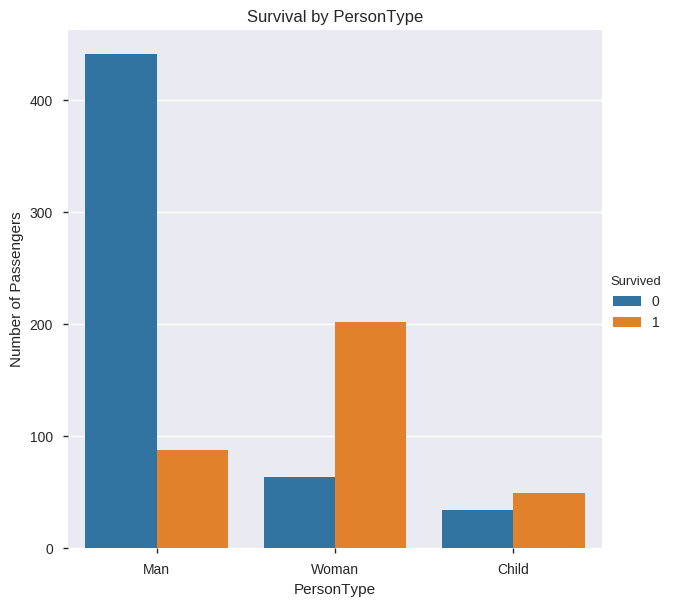

In [59]:
mx = sns.factorplot(x="PersonType", hue="Survived", data=titanic_input, kind="count", size=6)
mx.set(ylabel='Number of Passengers')
plt.title('Survival by PersonType');


Text(0.5,1,'Agewise distribution of the passengers aboard the Titanic')

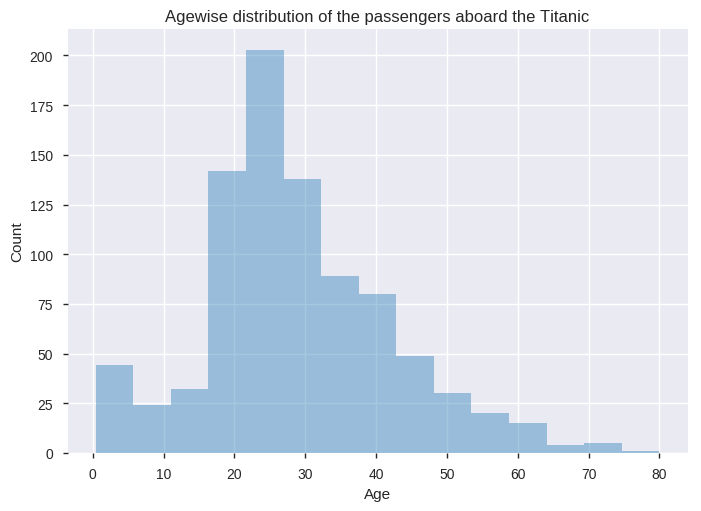

In [60]:
sns.distplot(titanic_input['Age'], bins=15, kde=False)
plt.ylabel('Count')
plt.title('Agewise distribution of the passengers aboard the Titanic')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


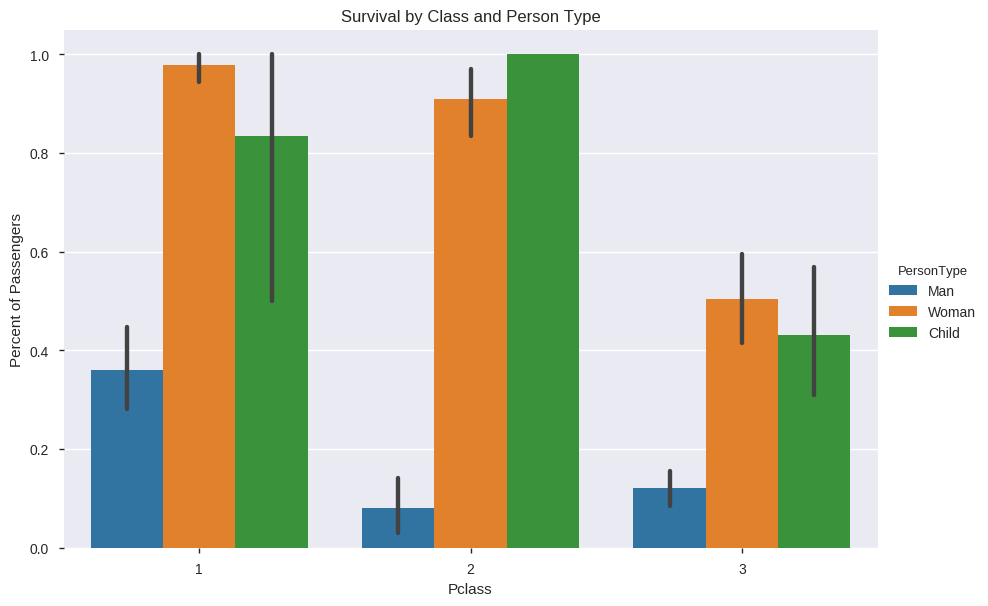

In [61]:
ax = sns.factorplot(x="Pclass", y="Survived", hue="PersonType", data=titanic_input, 
                    kind="bar",aspect=1.5, size=6)
ax.set(ylabel='Percent of Passengers')
plt.title('Survival by Class and Person Type');

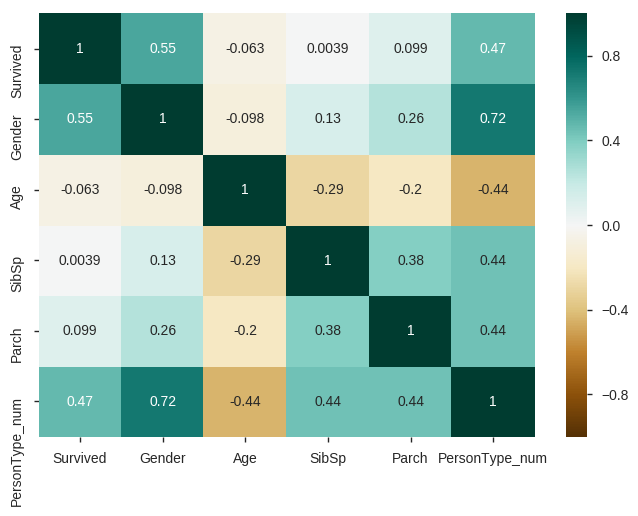

In [62]:
#titanic_input.drop(['Pclass','Embarked'],axis=1,inplace=True)
sns.heatmap(titanic_input[['Survived','Gender','Age','SibSp','Parch','PersonType_num']].corr()
            ,cmap="BrBG",annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


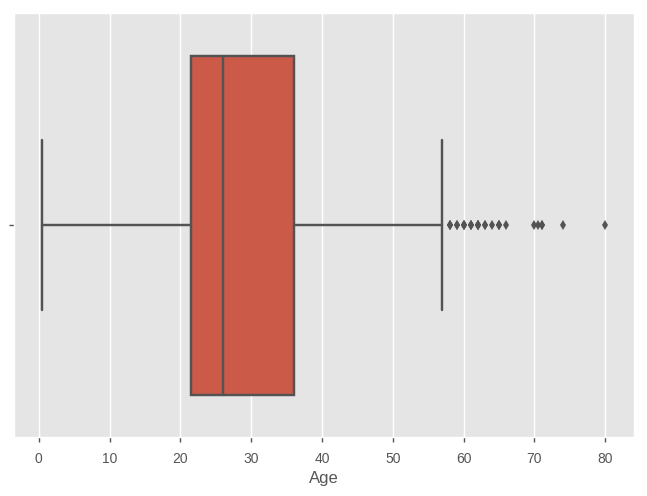

In [63]:
from matplotlib import style
style.use('ggplot')
#plt.figure(figsize=(12,4))
sns.boxplot(x='Age',data=titanic_input)

Text(0.5,1,'Scatterplot of passengers grouped by Fare and Age')

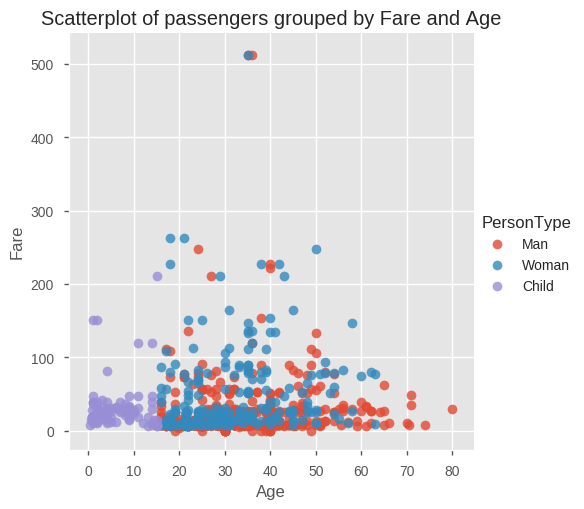

In [64]:
sns.lmplot('Age', 'Fare', data=titanic_input, fit_reg=False, hue="PersonType")
plt.title('Scatterplot of passengers grouped by Fare and Age')

Text(0.5,0.98,'Scatterplot of passengers w.r.t Fare and Age for diff. ports')

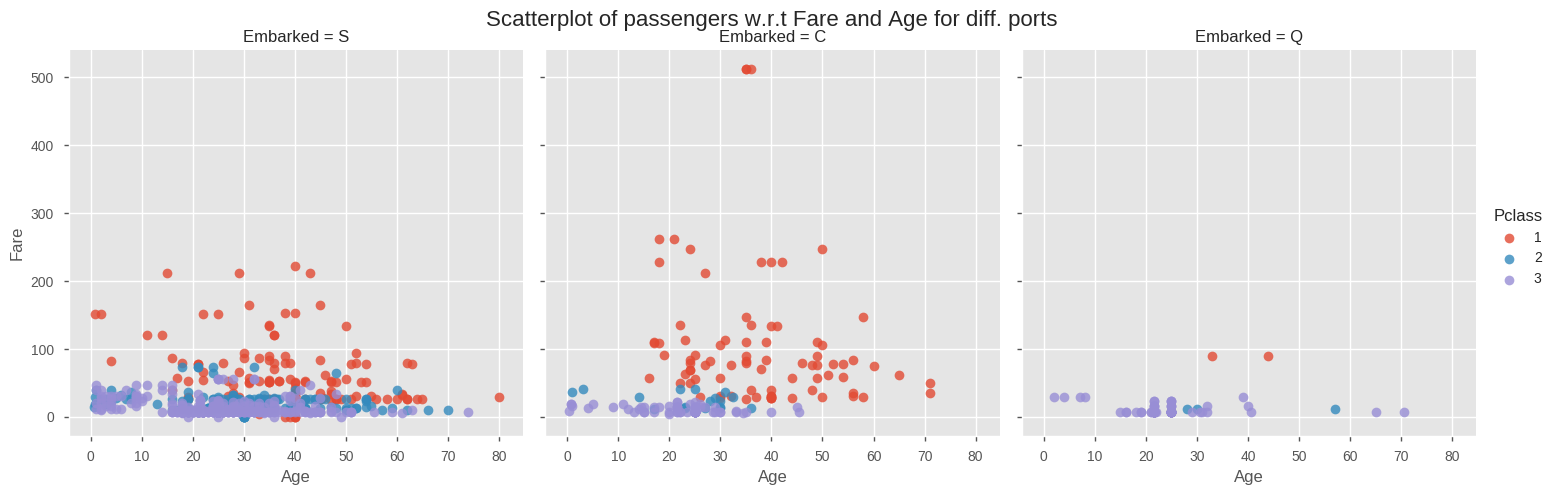

In [65]:
sns.lmplot('Age', 'Fare', data=titanic_input, fit_reg=False, hue="Pclass", col="Embarked")
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diff. ports', fontsize=16)


In [66]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

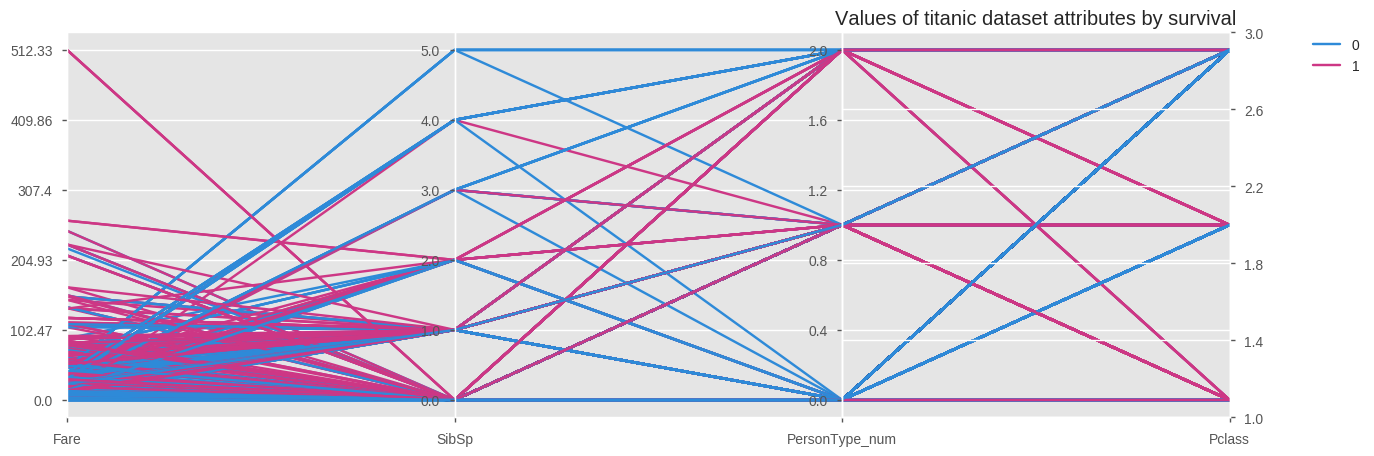

In [67]:
from matplotlib import ticker
df=titanic_input
titanic_input['Survived']=titanic_input['Survived'].astype('category')
cols = [ 'Fare', 'SibSp', 'PersonType_num', 'Pclass']
x = [i for i, _ in enumerate(cols)]
colours = ['#2e8ad8', '#cd3785']

# create dict of categories: colours
colours = {df['Survived'].cat.categories[i]: colours[i] for i, _ in enumerate(df['Survived'].cat.categories)}

# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

# Plot each row
for i, ax in enumerate(axes):
    for idx in df.index:
        survival_category = df.loc[idx, 'Survived']
        ax.plot(x, df.loc[idx, cols], colours[survival_category])
    ax.set_xlim([x[i], x[i+1]])
    
# Set the tick positions and labels on y axis for each plot
# Tick positions based on normalised data
# Tick labels are based on original data
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    norm_min = df[cols[dim]].min()
    norm_range = np.ptp(df[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)

for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[dim]])
    

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=6)
ax.set_xticklabels([cols[-2], cols[-1]])


# Remove space between subplots
plt.subplots_adjust(wspace=0)

# Add legend to plot
plt.legend(
    [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df['Survived'].cat.categories],
    df['Survived'].cat.categories,
    bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

plt.title("Values of titanic dataset attributes by survival")

plt.show()

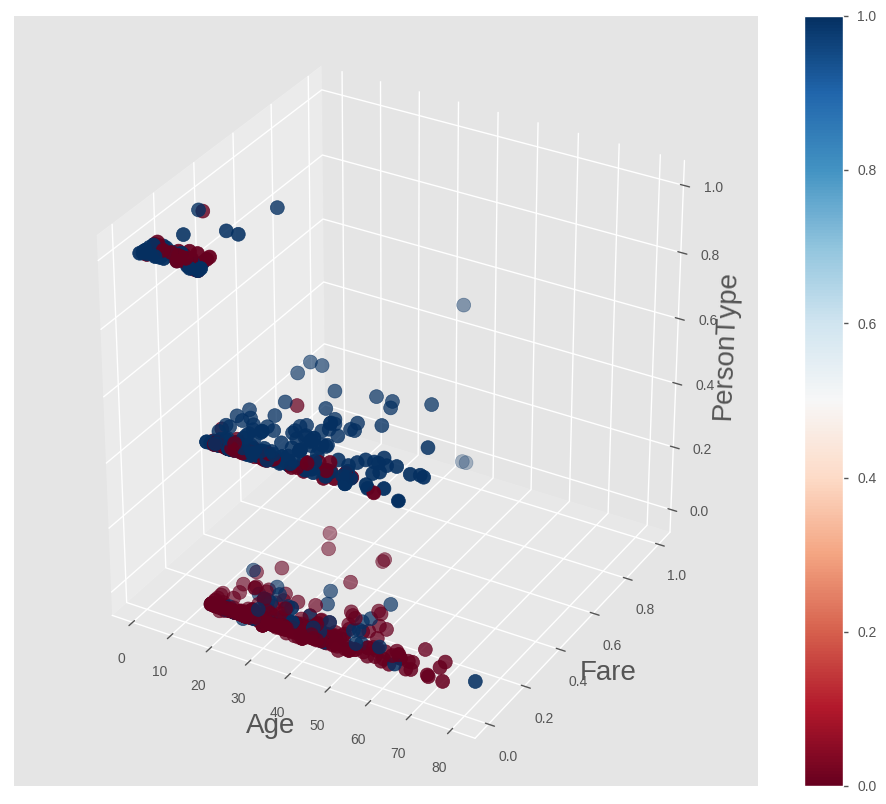

In [68]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pylab 

fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111, projection='3d')


x = titanic_input['Age']
y = titanic_input['Fare']
z = titanic_input['PersonType_num']
c = titanic_input['Survived']


cb1=ax.scatter(x, y, z, c=c, cmap=plt.cm.get_cmap('RdBu'),s=100)
plt.colorbar(cb1, ax=ax)
ax.set_xlabel('Age',fontsize=20)
ax.set_ylabel('Fare',fontsize=20)
ax.set_zlabel('PersonType',fontsize=20)


plt.show()
